This is the kernel version of the PCA. This is the technique, applied when the data is not linearly seperable.


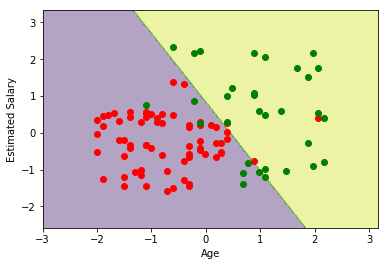

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('Social_Network_Ads.csv')
df.head()
x = df.iloc[:, [2, 3]].values
y = df.iloc[:, 4].values
#splitting the dataset
from sklearn.cross_validation import train_test_split
trainx, testx, trainy, testy = train_test_split(x, y, test_size = 0.25, random_state = 0)
#feature scaling the data
from sklearn.preprocessing import StandardScaler
scx = StandardScaler()
trainx = scx.fit_transform(trainx)
testx = scx.transform(testx)

#fitting the model
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression(random_state = 0)
model = reg.fit(trainx, trainy)



#checking the prediction accuracy.
predy = model.predict(testx)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testy, predy)
pd.DataFrame(cm)

from matplotlib.colors import ListedColormap
X_set, y_set = testx, testy
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.4)

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
X_setd = pd.DataFrame(X_set)
x_p = X_setd.loc[(y_set ==0), :].values
x_n = X_setd.loc[(y_set ==1), :].values



plt.scatter(x_p[:, 0], x_p[:, 1], color = 'red')
plt.scatter(x_n[:, 0], x_n[:, 1], color = 'green')
plt.scatter(x_i[:, 0], x_i[:, 1], color = 'blue')

plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

So now you notice here that, although Logistic regression classifies the data, it cannot linearly seperate all the data points. Thanks to this kernel technique, which will make the data linearly seperable!


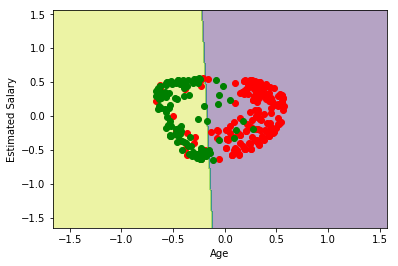

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('Social_Network_Ads.csv')
df.head()
x = df.iloc[:, [2, 3]].values
y = df.iloc[:, 4].values
#splitting the dataset
from sklearn.cross_validation import train_test_split
trainx, testx, trainy, testy = train_test_split(x, y, test_size = 0.25, random_state = 0)
#feature scaling the data
from sklearn.preprocessing import StandardScaler
scx = StandardScaler()
trainx = scx.fit_transform(trainx)
testx = scx.transform(testx)

#applying kernel PCA:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components =2, kernel = 'rbf')
trainx = kpca.fit_transform(trainx)
testx = kpca.transform(testx)


#fitting the model
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression(random_state = 0)
model = reg.fit(trainx, trainy)



#checking the prediction accuracy.
predy = model.predict(testx)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testy, predy)
pd.DataFrame(cm)

from matplotlib.colors import ListedColormap
X_set, y_set = trainx, trainy
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.4)

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
X_setd = pd.DataFrame(X_set)
x_p = X_setd.loc[(y_set ==0), :].values
x_n = X_setd.loc[(y_set ==1), :].values



plt.scatter(x_p[:, 0], x_p[:, 1], color = 'red')
plt.scatter(x_n[:, 0], x_n[:, 1], color = 'green')

plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()